In [1]:
# Employe Slary Predection

In [2]:
import pandas as pd

In [23]:
data = pd.read_csv("/content/dataset.csv")


In [27]:
data.head ()

,Employee_ID,Experience_Years,Education,Department,Certifications,Salary
0,a4c10d41-36ea-4676-a036-0e554de2751b,8.246547,High School,Tech,4.0,751312.247875
1,0f73d714-2aa9-4e73-a91c-be7d3de2158d,5.642905,Master,Tech,3.0,771396.449456
2,647026b7-25d5-4bb8-8040-35487459b5b3,4.190735,High School,Sales,2.0,359342.740560
3,5cab039d-13e8-456d-b7ce-4bbc64c25339,16.459336,High School,Marketing,2.0,723534.234247
4,d1fdc4e1-5ee7-4f22-9e1a-4d75224c02d4,13.980543,Master,Sales,3.0,NaN


In [4]:
data.tail(7)

,Employee_ID,Experience_Years,Education,Department,Certifications,Salary
1009993,ed32b86b-c6ca-4a82-8674-9e03005e33af,0.020775,Bachelor,Marketing,1.0,673284.970455
1009994,28155816-d531-44b9-b373-4e060fde83ca,23.631820,PhD,Sales,4.0,693243.399864
1009995,0bc6b404-7b4f-4c91-b948-3f5ab324c620,10.108301,PhD,Sales,0.0,565169.952774
1009996,b614c623-d009-4f39-973e-04f096a468e9,3.149405,NaN,HR,0.0,276840.275814
1009997,560dd6a2-2201-4a41-a903-88a245e02247,10.985226,Master,HR,1.0,538468.420776
1009998,e833cae3-d6b6-4e10-a550-6bc736710f16,23.282887,Master,Sales,1.0,NaN
1009999,be001d8c-2f18-41f9-b950-fc58f5f75a27,13.457183,High School,Tech,2.0,457345.438124


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010000 entries, 0 to 1009999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Employee_ID       990060 non-null  object 
 1   Experience_Years  989829 non-null  float64
 2   Education         989910 non-null  object 
 3   Department        989879 non-null  object 
 4   Certifications    990206 non-null  float64
 5   Salary            989980 non-null  float64
dtypes: float64(3), object(3)
memory usage: 46.2+ MB


In [6]:
zeros_cnt = (data['Experience_Years'] == 0).sum()
print(f"Number of zeros in 'Certifications' column: {zeros_cnt}")


Number of zeros in 'Certifications' column: 0


In [7]:
# Fill missing values with 0
data['Certifications'] = data['Certifications'].fillna(0)

# Optional: round and convert to integer
data['Certifications'] = data['Certifications'].round(0).astype(int)

In [8]:
print(data['Certifications'].head(41))

0     4
1     3
2     2
3     2
4     3
5     0
6     2
7     4
8     4
9     4
10    3
11    3
12    1
13    3
14    3
15    2
16    4
17    1
18    1
19    0
20    1
21    1
22    2
23    2
24    3
25    0
26    2
27    1
28    3
29    3
30    4
31    3
32    1
33    3
34    2
35    2
36    2
37    1
38    0
39    3
40    2
Name: Certifications, dtype: int64


In [9]:

data['Experience_Years'] = pd.to_numeric(data['Experience_Years'], errors='coerce')
data['Experience_Years'] = data['Experience_Years'].fillna(0)
data['Experience_Years'] = data['Experience_Years'].round(0).astype(int)
data['Salary'] = pd.to_numeric(data['Salary'],errors='coerce')
data['Salary'] = data['Salary'].fillna(0)
data['Salary'] = data['Salary'].round(0).astype(int)

In [10]:
# Convert to numeric
data['Experience_Years'] = pd.to_numeric(data['Experience_Years'], errors='coerce')
data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

# Fill NaNs with 0 temporarily and convert to int
data['Experience_Years'] = data['Experience_Years'].fillna(0).round(0).astype(int)
data['Salary'] = data['Salary'].fillna(0).round(0).astype(int)

# Replace 0 with column mean (calculated excluding 0s)
exp_mean = data.loc[data['Experience_Years'] != 0, 'Experience_Years'].mean()
sal_mean = data.loc[data['Salary'] != 0, 'Salary'].mean()

# Fill 0s with the calculated means
data['Experience_Years'] = data['Experience_Years'].replace(0, round(exp_mean))
data['Salary'] = data['Salary'].replace(0, round(sal_mean))


In [28]:
data.head()

,Employee_ID,Experience_Years,Education,Department,Certifications,Salary
0,a4c10d41-36ea-4676-a036-0e554de2751b,8.246547,High School,Tech,4.0,751312.247875
1,0f73d714-2aa9-4e73-a91c-be7d3de2158d,5.642905,Master,Tech,3.0,771396.449456
2,647026b7-25d5-4bb8-8040-35487459b5b3,4.190735,High School,Sales,2.0,359342.740560
3,5cab039d-13e8-456d-b7ce-4bbc64c25339,16.459336,High School,Marketing,2.0,723534.234247
4,d1fdc4e1-5ee7-4f22-9e1a-4d75224c02d4,13.980543,Master,Sales,3.0,NaN


In [12]:
null_values = data.isnull().sum()
print(null_values)

Employee_ID         19940
Experience_Years        0
Education           20090
Department          20121
Certifications          0
Salary                  0
dtype: int64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010000 entries, 0 to 1009999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Employee_ID       990060 non-null   object
 1   Experience_Years  1010000 non-null  int64 
 2   Education         989910 non-null   object
 3   Department        989879 non-null   object
 4   Certifications    1010000 non-null  int64 
 5   Salary            1010000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 46.2+ MB


In [14]:
data = data.dropna(subset=['Salary'])

In [15]:
data = data[(data != 0).all(axis=1)]

In [16]:
import numpy as np
import matplotlib as plt
import seaborn as sns

<Axes: xlabel='Experience_Years', ylabel='Salary'>

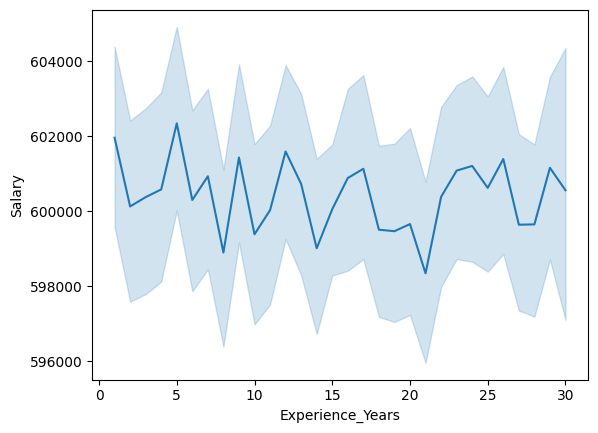

In [17]:
sns.lineplot(x='Experience_Years',y='Salary',data=data)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: Prepare your data (assuming 'Salary' is the target)
X = data.drop(['Salary','Employee_ID'], axis=1)    # Features
y = data['Salary']                 # Target

# Step 2: Convert categorical columns to numbers (label encoding)
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Step 3: Train/test split (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 5: Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 6: Display
print(feature_importance)


            Feature  Importance
0  Experience_Years    0.440916
2        Department    0.218986
1         Education    0.174774
3    Certifications    0.165325


<Axes: xlabel='Certifications', ylabel='Salary'>

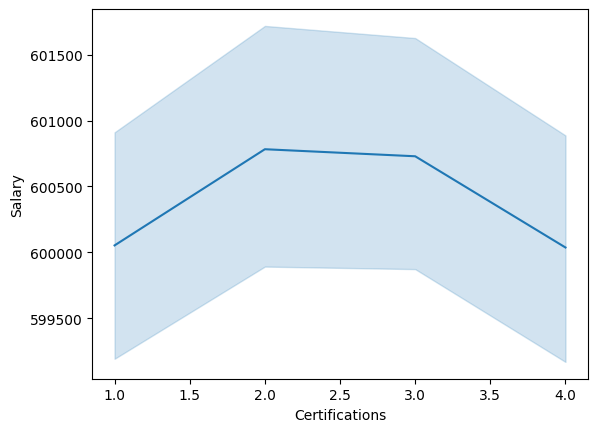

In [19]:
sns.lineplot(x='Certifications',y='Salary',data=data)

<Axes: xlabel='Education', ylabel='Salary'>

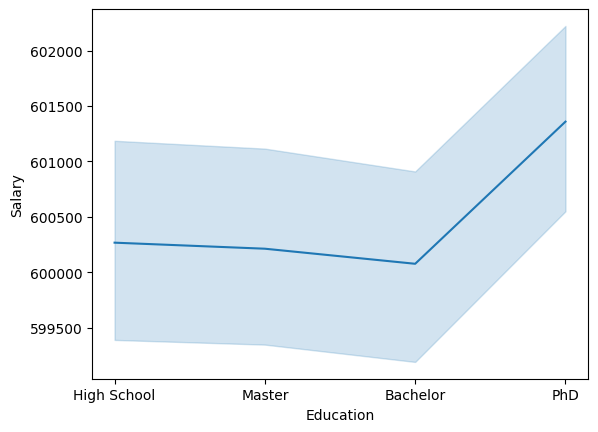

In [20]:
sns.lineplot(x='Education',y='Salary',data=data)

<Axes: xlabel='Department', ylabel='Salary'>

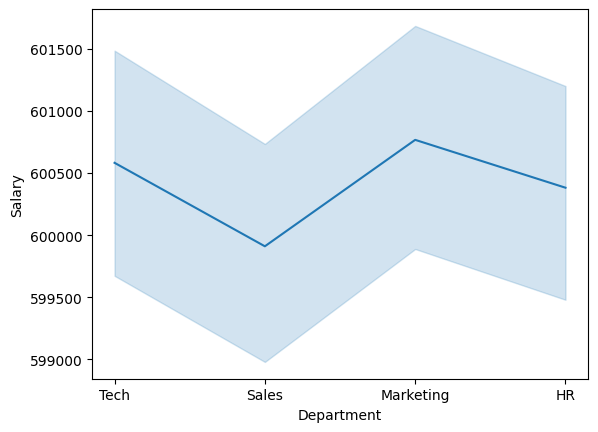

In [21]:
sns.lineplot(x='Department',y='Salary',data=data)

/tmp/ipython-input-22-432298883.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Importance', ylabel='Feature'>

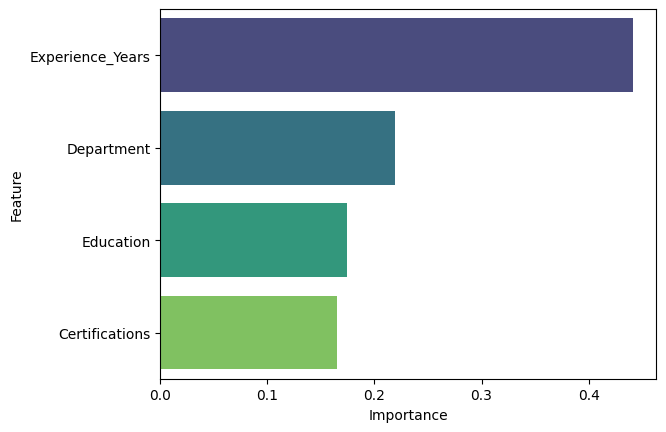

In [22]:
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance,
    palette="viridis"
)